In [2]:
%run ./Repos-exe-sample.ipynb

./Repos-exe-sample.ipynb:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "source": [
./Repos-exe-sample.ipynb:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "!pip install seaborn\n",
./Repos-exe-sample.ipynb:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "import pandas as pd\n",
./Repos-exe-sample.ipynb:11: Sett

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.concat([df_mix,df_rh])
for col in ['author_name','author_email','author_date','author_affiliation','auth_comm','diff_date']:
    del df[col]

In [154]:
df.groupby('committer_affiliation').count()

,repos_id0,committer_name,committer_email,committer_date,added,removed,whitespace,filename,date_attempted,git,repos_name,committer_year,committer_month,committer_day
committer_affiliation,,,,,,,,,,,,,,
RH/V,9286,9286,9286,9286,9286,9286,9286,9029,9286,9286,9286,9286,9286,9286
redhat,7623,7623,7623,7623,7623,7623,7623,7451,7623,7623,7623,7623,7623,7623


## Levenstein on email names

In [155]:
#Extract the email name
df["email_name"]=df['committer_email'].str.split('@', 1, expand=True)[0]

In [5]:
df.groupby('repos_name').size().nlargest(5)

repos_name
origin        674
wildfly       562
keycloak-1    487
kubernetes    294
vert-x3       257
dtype: int64

In [5]:
#Take origin project as example (origin has the largest commit number in this sample)
tmp=df[df['repos_name']=='origin']
tmp_ls=list(tmp['email_name'].unique())

In [39]:
#Install
!pip install distance

     |████████████████████████████████| 184kB 2.6MB/s eta 0:00:01
  Stored in directory: /tmp/pip-ephem-wheel-cache-sbj222pe/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built distance


In [174]:
#Apply levenstein distance 
import distance
tmp_len=len(tmp_ls)
res=np.zeros((tmp_len,tmp_len))
for i in range(tmp_len):
    for j in range(tmp_len):
        if i==j:
            res[i,i]=0
        else:
            res[i,j]=distance.levenshtein(tmp_ls[i],tmp_ls[j])

In [175]:
distance=pd.DataFrame(res)
distance

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,8.0,2.0,8.0,10.0,9.0,10.0,10.0,9.0,9.0,8.0,9.0
1,8.0,0.0,8.0,10.0,9.0,8.0,8.0,8.0,10.0,8.0,5.0,7.0
2,2.0,8.0,0.0,6.0,8.0,7.0,8.0,8.0,7.0,7.0,6.0,7.0
3,8.0,10.0,6.0,0.0,7.0,5.0,6.0,7.0,5.0,5.0,6.0,6.0
4,10.0,9.0,8.0,7.0,0.0,6.0,7.0,7.0,6.0,6.0,7.0,6.0
5,9.0,8.0,7.0,5.0,6.0,0.0,5.0,5.0,4.0,6.0,4.0,3.0
6,10.0,8.0,8.0,6.0,7.0,5.0,0.0,6.0,6.0,7.0,6.0,5.0
7,10.0,8.0,8.0,7.0,7.0,5.0,6.0,0.0,7.0,7.0,6.0,6.0
8,9.0,10.0,7.0,5.0,6.0,4.0,6.0,7.0,0.0,5.0,5.0,4.0
9,9.0,8.0,7.0,5.0,6.0,6.0,7.0,7.0,5.0,0.0,4.0,6.0


In [176]:
#Filter out those <= 4 to see if anyone using both redhat and personal address
#Not including those on diagnol 
for i in range(tmp_len):
    a=[]
    for ele in list(distance[i][distance[i]<=4].index):
        if ele != i:
            a.append(tmp_ls[ele])
    print(tmp_ls[i],a)

dr.d.mason ['drdmason']
dingyichen []
drdmason ['dr.d.mason']
camunoz []
sflaniga []
aeng ['pahuang', 'dchen', 'hding']
kgough []
asgeirf []
pahuang ['aeng', 'hding']
cchance ['dchen']
dchen ['aeng', 'cchance']
hding ['aeng', 'pahuang']


## Hamming distance


In [117]:
!pip install textdistance

In [165]:
tmp=df[df['repos_name']=='zanata-platform']
tmp_ls=list(tmp['email_name'].unique())

In [166]:
import textdistance as td
tmp_len=len(tmp_ls)
res=np.zeros((tmp_len,tmp_len))
for i in range(tmp_len):
    for j in range(tmp_len):
        if i==j:
            res[i,i]=0
        else:
            res[i,j]=td.hamming(tmp_ls[i],tmp_ls[j])

In [167]:
distance2=pd.DataFrame(res)
distance2

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,8.0,8.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,10.0
1,8.0,0.0,9.0,10.0,9.0,8.0,10.0,10.0,10.0,10.0,9.0,10.0
2,8.0,9.0,0.0,8.0,8.0,8.0,8.0,8.0,7.0,8.0,7.0,8.0
3,10.0,10.0,8.0,0.0,7.0,7.0,6.0,7.0,5.0,5.0,6.0,7.0
4,10.0,9.0,8.0,7.0,0.0,8.0,8.0,8.0,7.0,6.0,7.0,8.0
5,10.0,8.0,8.0,7.0,8.0,0.0,6.0,6.0,7.0,7.0,5.0,5.0
6,10.0,10.0,8.0,6.0,8.0,6.0,0.0,7.0,6.0,7.0,6.0,5.0
7,10.0,10.0,8.0,7.0,8.0,6.0,7.0,0.0,7.0,7.0,6.0,7.0
8,10.0,10.0,7.0,5.0,7.0,7.0,6.0,7.0,0.0,6.0,6.0,7.0
9,10.0,10.0,8.0,5.0,6.0,7.0,7.0,7.0,6.0,0.0,4.0,7.0


In [168]:
#Filter out those <= 4 to see if anyone using both redhat and personal address
#Not including those on diagnol 
for i in range(tmp_len):
    a=[]
    for ele in list(distance2[i][distance2[i]<=6].index):
        if ele != i:
            a.append(tmp_ls[ele])
    print(tmp_ls[i],a)

dr.d.mason []
dingyichen []
drdmason []
camunoz ['kgough', 'pahuang', 'cchance', 'dchen']
sflaniga ['cchance']
aeng ['kgough', 'asgeirf', 'dchen', 'hding']
kgough ['camunoz', 'aeng', 'pahuang', 'dchen', 'hding']
asgeirf ['aeng', 'dchen']
pahuang ['camunoz', 'kgough', 'cchance', 'dchen']
cchance ['camunoz', 'sflaniga', 'pahuang', 'dchen']
dchen ['camunoz', 'aeng', 'kgough', 'asgeirf', 'pahuang', 'cchance', 'hding']
hding ['aeng', 'kgough', 'dchen']


## Any person using both email address

In [172]:
tmp.groupby(['committer_name','email_name']).count()

repos_id0  committer_email  \
committer_name          email_name                               
"Caius ""kaio"" Chance" cchance             1                1   
Alex Eng                aeng               23               23   
Asgeir Frimannsson      asgeirf            11               11   
Carlos A. Munoz         camunoz             3                3   
David Mason             dr.d.mason          8                8   
                        drdmason            1                1   
Ding-Yi Chen            dchen               1                1   
                        dingyichen          1                1   
Helen Ding              hding               3                3   
Kathryn Gough           kgough              1                1   
Patrick Huang           pahuang             9                9   
Sean Flanigan           sflaniga           29               29   
Unknown                 kgough              4                4   
kgough                  kgough              5                5   

                                    committer_date  added  removed  \
committer_name          email_name                                   
"Caius ""kaio"" Chance" cchance                  1      1        1   
Alex Eng                aeng                    23     23       23   
Asgeir Frimannsson      asgeirf                 11     11       11   
Carlos A. Munoz         camunoz                  3      3        3   
David Mason             dr.d.mason               8      8        8   
                        drdmason                 1      1        1   
Ding-Yi Chen            dchen                    1      1        1   
                        dingyichen               1      1        1   
Helen Ding              hding                    3      3        3   
Kathryn Gough           kgough                   1      1        1   
Patrick Huang           pahuang                  9      9        9   
Sean Flanigan           sflaniga                29     29       29   
Unknown                 kgough                   4      4        4   
kgough                  kgough                   5      5        5   

                                    whitespace  filename  date_attempted  git  \
committer_name          email_name                                              
"Caius ""kaio"" Chance" cchance              1         0               1    1   
Alex Eng                aeng                23        22              23   23   
Asgeir Frimannsson      asgeirf             11        10              11   11   
Carlos A. Munoz         camunoz              3         3               3    3   
David Mason             dr.d.mason           8         8               8    8   
                        drdmason             1         1               1    1   
Ding-Yi Chen            dchen                1         1               1    1   
                        dingyichen           1         1               1    1   
Helen Ding              hding                3         3               3    3   
Kathryn Gough           kgough               1         1               1    1   
Patrick Huang           pahuang              9         9               9    9   
Sean Flanigan           sflaniga            29        28              29   29   
Unknown                 kgough               4         4               4    4   
kgough                  kgough               5         4               5    5   

                                    repos_name  committer_affiliation  \
committer_name          email_name                                      
"Caius ""kaio"" Chance" cchance              1                      1   
Alex Eng                aeng                23                     23   
Asgeir Frimannsson      asgeirf             11                     11   
Carlos A. Munoz         camunoz              3                      3   
David Mason             dr.d.mason           8                      8   
                        drdmason             1    

We can see that the following people are using two email address in this project:
- David Mason
- Ding-Yi Chen  

However, this algorithm (Hamming) is not sorting them out. It may due to the punctuations.   
And Levenstein performs well with punctuations. 

## Each committer's contribution in each project    
- number of commits / year and /month
- rank of contribution 
- k nearest neighbors of committer

In [4]:
#Number of commits/year
year_df=df.groupby(['committer_year','committer_name'])['committer_affiliation'].count().reset_index(name='count')

In [5]:
#Number of commits/month
month_df=df.groupby(['committer_month','committer_name'])['committer_affiliation'].count().reset_index(name='count')

In [6]:
#Rank column
year_df['rank_yr']=year_df.groupby(['committer_year'])['count'].rank(ascending=False).astype(int)

In [7]:
month_df['rank_mo']=month_df.groupby(['committer_month'])['count'].rank(ascending=False).astype(int)

In [8]:
#Knn neighbors of committers

#First in each project
repos_ls=df['repos_name'].unique()

In [9]:
tmp_df2=df.groupby('repos_name').size().reset_index(name='count')

In [10]:
tmp_df2

,repos_name,count
0,3scale-cli,1
1,3scale-istio-adapter,1
2,3scale-porta-go-client,1
3,3scale_toolbox,1
4,BenchmarkDotNet,12
5,CentOS-Dockerfiles,2
6,CliCommandLineParser,2
7,ConfigJSR,1
8,EOL_openstack-puppet,2
9,Fedora-Dockerfiles,5


In [10]:
len(df[df['repos_name']=='camel'].groupby('committer_name'))

10

In [11]:
df[df['repos_name']=='camel'].groupby('committer_name')['added','removed','whitespace'].sum()

,added,removed,whitespace
committer_name,,,
Andrea Cosentino,481,196,190
Charles Moulliard,66,1,23
Claus Ibsen,17,22,0
Guillaume Nodet,2500,2521,549
Nicola Ferraro,329,21,65
Pascal Schumacher,2,2,0
Tomohisa Igarashi,1,1,0
Willem Jiang,66,4,7
aldettinger,0,5,4


In [24]:
#Used for each project
from sklearn.neighbors import NearestNeighbors 
def knn_committer(df,ele): #df: original; ele: project name
    #filter out repos with count>2
    if len(df[df['repos_name']==ele].groupby('committer_name'))>2: 
        knn_df=df[df['repos_name']==ele]
        knn_df=knn_df.groupby('committer_name')['added','removed','whitespace'].sum()
        #standardize the dataframe
        for i in ['added','removed','whitespace']:
            knn_df[i]=(knn_df[i]-np.mean(knn_df[i]))/np.std(knn_df[i])
        nbrs=NearestNeighbors(n_neighbors=2,algorithm='ball_tree').fit(knn_df)
        distances, indices = nbrs.kneighbors(knn_df)
        res=[]
        for i in range(len(knn_df['added'])):
            res.append(indices[i][1])
        knn_df['neighbor']=res
        return(knn_df)
    else:
        return('NA')

In [25]:
#Take camel as example
knn_committer(df=df,ele='linux')

,added,removed,whitespace,neighbor
committer_name,,,,
Alexey Dobriyan,-0.299241,-0.251326,-0.387384,28
Anton Vorontsov,-0.297602,-0.353848,-0.387384,1
Arnaldo Carvalho de Melo,5.989367,0.948785,1.156362,11
Avi Kivity,-0.289405,-0.341787,-0.362485,36
Bartlomiej Zolnierkiewicz,-0.264815,-0.160866,-0.337586,33
Ben Skeggs,-0.091042,0.110516,0.060800,37
Bjorn Helgaas,-0.204158,-0.245296,-0.088595,35
Dave Airlie,-0.056615,0.755802,-0.362485,9
Dave Jones,-0.295963,-0.341787,-0.387384,15


In [14]:
#Then look back into original df to see their affiliation
def look_for_knn(df,ele,i):
    starter=knn_committer(df=df,ele=ele).index[i]
    nexter=knn_committer(df=df,ele=ele).index[knn_committer(df=df,ele=ele)['neighbor'][i]]
    return((df['committer_affiliation'][(df['committer_name']==starter)]).unique(),(df['committer_affiliation'][(df['committer_name']==nexter)]).unique())

In [15]:
#Loop through all the committers to see if anyone's neighbor can give more information (from RH)
for i in range(len(knn_committer(df=df,ele='camel')['added'])):
    print((look_for_knn(df=df,ele='camel',i=i)))

(array(['RH/V'], dtype=object), array(['RH/V'], dtype=object))
(array(['RH/V', 'redhat'], dtype=object), array(['RH/V'], dtype=object))
(array(['RH/V'], dtype=object), array(['RH/V'], dtype=object))
(array(['RH/V'], dtype=object), array(['RH/V'], dtype=object))
(array(['RH/V'], dtype=object), array(['RH/V'], dtype=object))
(array(['RH/V'], dtype=object), array(['RH/V'], dtype=object))
(array(['RH/V'], dtype=object), array(['RH/V'], dtype=object))
(array(['RH/V'], dtype=object), array(['RH/V'], dtype=object))
(array(['RH/V'], dtype=object), array(['RH/V'], dtype=object))
(array(['RH/V'], dtype=object), array(['RH/V', 'redhat'], dtype=object))


From the Camel project result, we can look into the second committer and the last committer because either him or his neighbor comes from RH (has record using redhat email).     
These two people: Charles Moulliard and Iburgazzoli

## Look at weekday / weekend and morning / evening of commit time 

In [11]:
# Feature of weekday
day=[]
for ele in df['committer_date']: #weekday=0, weekend=1
    day.append(ele.weekday())
df['weekday']=day

In [12]:
# Feature of morning or evening
def get_part_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )

res=[]
for ele in df['committer_date']:
    res.append(get_part_of_day(ele.hour))
df['day_part']=res

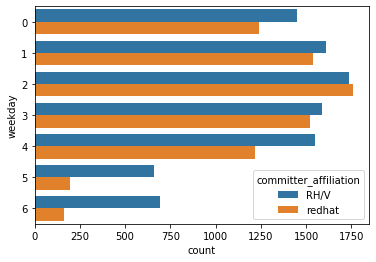

In [164]:
import seaborn as sns 
%matplotlib inline
sns.countplot(y=df['weekday'],hue=df['committer_affiliation'])

The point that RH/V commite more on weekends can be used.

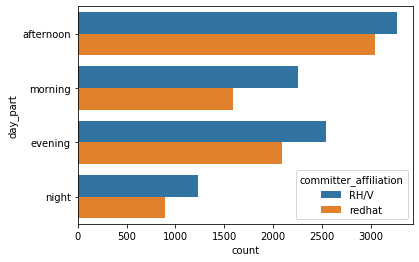

In [165]:
sns.countplot(y=df['day_part'],hue=df['committer_affiliation'])

In [13]:
#A df counting how many commits from weekday/weekend for each committer
weekday_df=df.groupby(['committer_name','weekday'])['committer_affiliation'].count().reset_index(name='count')

In [14]:
#A df counting how many commits from each part of day for each committer
daypart_df=df.groupby(['committer_name','day_part'])['committer_affiliation'].count().reset_index(name='count')

In [15]:
#Calculate what percentage a committer commit in weekday/weekend
committer_weekday=weekday_df.groupby(['committer_name','weekday']).agg({'count':'sum'})
committer_weekday=committer_weekday.groupby(level=0).apply(lambda x: x/float(x.sum()))

In [16]:
#Calculate what percentage a committer commit in each part of day
committer_daypart=daypart_df.groupby(['committer_name','day_part']).agg({'count':'sum'})
committer_daypart=committer_daypart.groupby(level=0).apply(lambda x: x/float(x.sum()))

In [17]:
committer_daypart

count
committer_name          day_part           
"Caius ""kaio"" Chance" night      1.000000
--add                   morning    1.000000
14rcole                 afternoon  1.000000
Aaron Patterson         afternoon  0.250000
                        night      0.750000
Aaron Prindle           evening    1.000000
Aaron Tan               evening    1.000000
Abhijith Das            afternoon  0.500000
                        evening    0.500000
Abhishek Koneru         evening    1.000000
Abhishek Shah           night      1.000000
Adam Abrons             night      1.000000
Adam Brousseau          evening    1.000000
Adam Cigánek            afternoon  1.000000
Adam Haile              evening    1.000000
Adam Jolicoeur          afternoon  1.000000
Adam Miller             evening    1.000000
Adam Price              afternoon  0.600000
                        evening    0.400000
Adam Ruzicka            morning    1.000000
Adam Samalik            afternoon  0.200000
                        evening    0.200000
                        morning    0.600000
Adam Sitnik             afternoon  0.750000
                        evening    0.250000
Adam Young              evening    0.500000
                        night      0.500000
Ade Lee                 afternoon  0.083333
                        evening    0.666667
                        night      0.250000
...                                     ...
william chang           afternoon  1.000000
witmicko                morning    1.000000
wycats                  morning    0.333333
                        night      0.666667
xiaoping378             night      1.000000
xihui                   evening    1.000000
yankaiz                 evening    1.000000
ymqytw                  evening    1.000000
yosifkit                afternoon  1.000000
yuusuke                 morning    1.000000
yuzo                    morning    0.500000
                        night      0.500000
zhengjiajin             night      1.000000
zherman0                night      1.000000
zmhassan                evening    0.736842
                        night      0.263158
zmo                     night      1.000000
Øystein Bedin           evening    1.000000
Łukasz Osipiuk          afternoon  0.500000
                        evening    0.500000
Łukasz Spas             night      1.000000
Łukasz Strzałkowski     afternoon  1.000000
Łukasz Wojniłowicz      afternoon  0.636364
                        evening    0.272727
                        morning    0.090909
Šimon Koníček           evening    0.500000
                        night      0.500000
Šimon Lukašík           afternoon  0.333333
                        morning    0.333333
                        night      0.333333

[4292 rows x 1 columns]

In [22]:
df[df['committer_name']=='zmhassan']
#This committer is more likely to be volunteer.

,repos_id0,committer_name,committer_email,committer_date,added,removed,whitespace,filename,date_attempted,git,repos_name,committer_affiliation,committer_year,committer_month,committer_day,weekday,day_part
7334,2098,zmhassan,zak.hassan1010@gmail.com,2018-01-12 18:29:25,1,140,0,(Deleted) vendor/k8s.io/kubernetes/pkg/api/met...,2019-05-20 00:00:04,https://github.com/radanalyticsio/kubespark-op...,kubespark-operator,RH/V,2018,1,12,4,evening
7335,2098,zmhassan,zak.hassan1010@gmail.com,2018-01-12 18:29:25,1,151,0,(Deleted) vendor/k8s.io/kubernetes/pkg/client/...,2019-05-20 00:00:33,https://github.com/radanalyticsio/kubespark-op...,kubespark-operator,RH/V,2018,1,12,4,evening
7336,2098,zmhassan,zak.hassan1010@gmail.com,2018-01-12 18:29:25,58,1,6,vendor/k8s.io/kubernetes/pkg/client/listers/ex...,2019-05-20 00:00:39,https://github.com/radanalyticsio/kubespark-op...,kubespark-operator,RH/V,2018,1,12,4,evening
7337,2098,zmhassan,zak.hassan1010@gmail.com,2018-01-12 18:29:25,1,83,0,(Deleted) vendor/k8s.io/kubernetes/pkg/client/...,2019-05-20 00:00:44,https://github.com/radanalyticsio/kubespark-op...,kubespark-operator,RH/V,2018,1,12,4,evening
7338,2098,zmhassan,zak.hassan1010@gmail.com,2018-01-12 18:29:25,20750,1,8,vendor/k8s.io/kubernetes/pkg/generated/openapi...,2019-05-20 00:00:51,https://github.com/radanalyticsio/kubespark-op...,kubespark-operator,RH/V,2018,1,12,4,evening
7339,2098,zmhassan,zak.hassan1010@gmail.com,2018-01-12 18:29:25,121,1,26,vendor/k8s.io/kubernetes/pkg/kubectl/plugins/e...,2019-05-20 00:00:59,https://github.com/radanalyticsio/kubespark-op...,kubespark-operator,RH/V,2018,1,12,4,evening
7340,2098,zmhassan,zak.hassan1010@gmail.com,2018-01-12 18:29:25,76,1,14,vendor/k8s.io/kubernetes/pkg/registry/rbac/esc...,2019-05-20 00:01:18,https://github.com/radanalyticsio/kubespark-op...,kubespark-operator,RH/V,2018,1,12,4,evening
7341,2098,zmhassan,zak.hassan1010@gmail.com,2018-01-12 18:29:25,1,95,0,(Deleted) vendor/k8s.io/kubernetes/pkg/registr...,2019-05-20 00:01:20,https://github.com/radanalyticsio/kubespark-op...,kubespark-operator,RH/V,2018,1,12,4,evening
7342,2098,zmhassan,zak.hassan1010@gmail.com,2018-01-12 18:29:25,76,1,14,vendor/k8s.io/kubernetes/staging/src/k8s.io/cl...,2019-05-20 00:02:05,https://github.com/radanalyticsio/kubespark-op...,kubespark-operator,RH/V,2018,1,12,4,evening
7343,2098,zmhassan,zak.hassan1010@gmail.com,2018-01-12 18:29:25,82,1,17,vendor/k8s.io/kubernetes/test/e2e_federation/e...,2019-05-20 00:02:12,https://github.com/radanalyticsio/kubespark-op...,kubespark-operator,RH/V,2018,1,12,4,evening


## What about the redhatters commit on 5/6

In [23]:
rh_56=df[df['committer_affiliation']=='redhat']
rh_56=pd.concat([rh_56[rh_56['weekday']==5],rh_56[rh_56['weekday']==6]])

In [24]:
str(rh_56['committer_date'][82].hour)+':'+str(rh_56['committer_date'][82].minute)+':'+str(rh_56['committer_date'][82].second)

'9:22:41'

In [25]:
#Only convert to time 
from datetime import datetime
res=[]
for ele in rh_56['committer_date']:
    res.append(datetime.strptime(str(ele.hour)+':'+str(ele.minute)+':'+str(ele.second), '%H:%M:%S').time())
rh_56['time']=res

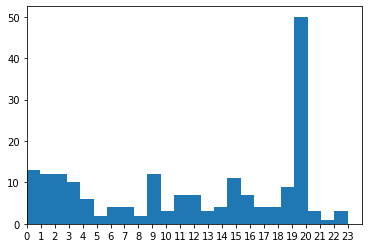

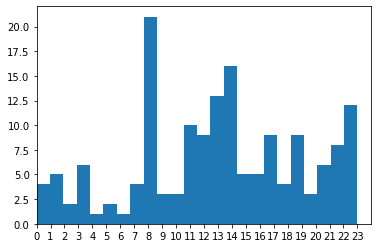

In [26]:
def chart(occurance_list):
    hour_list = [t.hour for t in occurance_list]
    numbers=[x for x in range(0,24)]
    labels=map(lambda x: str(x), numbers)
    plt.xticks(numbers, labels)
    plt.xlim(0,24)
    plt.hist(hour_list,bins=24)
    plt.show()
chart(rh_56[rh_56['weekday']==5]['time'])
chart(rh_56[rh_56['weekday']==6]['time'])

## Create percentage features for each committers 
Need a committer level dataframe: the percentages that he/she commits on a certain weekday; the percentages that he/she commits in a part of day.

In [27]:
#Reframing the weekday dataframe 
committer_weekday=committer_weekday.pivot_table(columns='weekday', index='committer_name', values='count', fill_value=0)

In [28]:
#Reframing the daypart dataframe 
committer_daypart=committer_daypart.pivot_table(columns='day_part', index='committer_name', values='count', fill_value=0)

In [29]:
committer_daypart

day_part,afternoon,evening,morning,night
committer_name,,,,
"""Caius """"kaio"""" Chance""",0.000000,0.000000,0.000000,1.000000
--add,0.000000,0.000000,1.000000,0.000000
14rcole,1.000000,0.000000,0.000000,0.000000
Aaron Patterson,0.250000,0.000000,0.000000,0.750000
Aaron Prindle,0.000000,1.000000,0.000000,0.000000
Aaron Tan,0.000000,1.000000,0.000000,0.000000
Abhijith Das,0.500000,0.500000,0.000000,0.000000
Abhishek Koneru,0.000000,1.000000,0.000000,0.000000
Abhishek Shah,0.000000,0.000000,0.000000,1.000000


In [30]:
#A dataframe on committer level with percentage of commit during each time interval 
committer_df=pd.merge(committer_weekday,committer_daypart,on='committer_name')

In [62]:
committer_df

,0,1,2,3,4,5,6,afternoon,evening,morning,night
committer_name,,,,,,,,,,,
"""Caius """"kaio"""" Chance""",0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
--add,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
14rcole,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Aaron Patterson,0.000000,0.125000,0.125000,0.375000,0.250000,0.000000,0.125000,0.250000,0.000000,0.000000,0.750000
Aaron Prindle,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Aaron Tan,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Abhijith Das,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000
Abhishek Koneru,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Abhishek Shah,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


## Load in RH employee list
A hard equality comparison is not applicable because a lot of languages have accent signs. So a soft comparison needs to be used.

In [25]:
rh_txt=list(open('rh-employee-list.txt','r').read().split('\n'))

In [1]:
!pip install unidecode

     |████████████████████████████████| 245kB 1.3MB/s eta 0:00:01


In [21]:
# Transfer names in github data from Unicode to ACSII
# https://en.wikipedia.org/wiki/List_of_Unicode_characters#Basic_Latin
from unidecode import unidecode
name_df={'name_p': df['committer_name'][df['committer_affiliation']=='RH/V'].unique()}
name_df=pd.DataFrame(name_df)

In [23]:
res=[]
for ele in df['committer_name'][df['committer_affiliation']=='RH/V'].unique():
    res.append(unidecode(ele))
name_df['name_a']=res

In [24]:
name_df
# 2514 for df, 1637 for RH/V

,name_p,name_a
0,Nicola Ferraro,Nicola Ferraro
1,lburgazzoli,lburgazzoli
2,Andrea Cosentino,Andrea Cosentino
3,Guillaume Nodet,Guillaume Nodet
4,aldettinger,aldettinger
5,Pascal Schumacher,Pascal Schumacher
6,Claus Ibsen,Claus Ibsen
7,Charles Moulliard,Charles Moulliard
8,Willem Jiang,Willem Jiang
9,Tomohisa Igarashi,Tomohisa Igarashi


In [40]:
print(sum(name_df['name_a'].isin(rh_txt)),sum(name_df['name_p'].isin(rh_txt)))
#11 employees with accent marks in their names were filtered out with unidecode
#After checking, we see that employee list is in ASCII.

183 172


## Within each repo, for each committer, the percentage of changes 

In [26]:
#for ele in df['repos_name'].unique():
def project_df(ele): #ele is the project name
    #Data frame for this project
    df_proj=df[df['repos_name']==ele]
    df_proj2=df_proj.groupby('committer_name')['added','removed','whitespace'].sum()
    df_proj2=pd.merge(df_proj2,df_proj.groupby('committer_name').size().reset_index(name='touched'),on='committer_name')
    
    #Transfer number of changes to percentage / total number in this project
    df_proj2['added']=df_proj2['added']/sum(df_proj2['added'])
    df_proj2['removed']=df_proj2['removed']/sum(df_proj2['removed'])
    df_proj2['whitespace']=df_proj2['whitespace']/sum(df_proj2['whitespace'])
    df_proj2['touched']=df_proj2['touched']/sum(df_proj2['touched'])
    return(df_proj2)

In [27]:
project_df('linux')

,committer_name,added,removed,whitespace,touched
0,Alexey Dobriyan,0.000000,0.006738,0.000000,0.004505
1,Anton Vorontsov,0.000127,0.000000,0.000000,0.004505
2,Arnaldo Carvalho de Melo,0.488725,0.085612,0.092676,0.139640
3,Avi Kivity,0.000764,0.000793,0.001495,0.018018
4,Bartlomiej Zolnierkiewicz,0.002676,0.012683,0.002990,0.036036
5,Ben Skeggs,0.016180,0.030519,0.026906,0.094595
6,Bjorn Helgaas,0.007389,0.007134,0.017937,0.027027
7,Dave Airlie,0.018856,0.072929,0.001495,0.040541
8,Dave Jones,0.000255,0.000793,0.000000,0.004505
9,David Howells,0.002421,0.074514,0.000000,0.054054


In [28]:
#Repeat this step for each project
df_committer=[project_df(ele) for ele in df['repos_name'].unique()]

In [29]:
df_committer2=df_committer[0]
for i in range(1,len(df_committer)-1):
    df_committer2=df_committer2.append(df_committer[i])
#df_committer2: NaN means 0 of changes so no percentage

## Rank for each project 

In [30]:
#Number of commits/year
def project_year(ele): 
    subdf=df[df['repos_name']==ele]
    year_df=subdf.groupby(['committer_year','committer_name'])['committer_affiliation'].count().reset_index(name='count')
    #Rank column
    year_df['rank_yr']=year_df.groupby(['committer_year'])['count'].rank(ascending=False).astype(int)
    print(year_df)

In [31]:
project_year('linux')

     committer_year             committer_name  count  rank_yr
0              2005                Jeff Garzik      3        1
1              2006          Steven Whitehouse      2        1
2              2006                  Tejun Heo      1        2
3              2007  Bartlomiej Zolnierkiewicz      2        1
4              2007                 Dave Jones      1        2
5              2007          Steven Whitehouse      1        2
6              2008            Alexey Dobriyan      1        5
7              2008                 Avi Kivity      1        5
8              2008  Bartlomiej Zolnierkiewicz      5        1
9              2008            Dmitry Torokhov      2        4
10             2008                Jeff Garzik      3        3
11             2008      Mauro Carvalho Chehab      4        2
12             2009                 Avi Kivity      1        5
13             2009  Bartlomiej Zolnierkiewicz      1        5
14             2009              David Howells      2  

In [32]:
#Number of commits/month
def project_month(ele):
    subdf=df[df['repos_name']==ele]
    month_df=subdf.groupby(['committer_month','committer_name'])['committer_affiliation'].count().reset_index(name='count')
    month_df['rank_mo']=month_df.groupby(['committer_month'])['count'].rank(ascending=False).astype(int)
    print(month_df)

In [33]:
project_month('linux')

     committer_month             committer_name  count  rank_mo
0                  1   Arnaldo Carvalho de Melo      1        8
1                  1  Bartlomiej Zolnierkiewicz      2        4
2                  1                 Ben Skeggs      5        2
3                  1              Bjorn Helgaas      2        4
4                  1                Dave Airlie      1        8
5                  1             David Teigland      1        8
6                  1            Dmitry Torokhov      1        8
7                  1                 Lyude Paul      1        8
8                  1      Mauro Carvalho Chehab      6        1
9                  1         Michael S. Tsirkin      1        8
10                 1          Steven Whitehouse      2        4
11                 2   Arnaldo Carvalho de Melo      1        6
12                 2  Bartlomiej Zolnierkiewicz      2        1
13                 2                 Ben Skeggs      2        1
14                 2            Dmitry T

## Repo path encoding --> features
For each project, expand repo path into folder level. 

In [34]:
#Calculate level by spliting /
#A feature indicating deletion
#A feature indicating merge commit
class cluster_df:
    def __init__(self, proj):
        self.proj=proj
    def make_df(self):
        df_proj=df[df['repos_name']==self.proj]
        level=[]
        delete=[]
        mergecomm=[]
        for ele in df_proj['filename']:
            level.append(len(ele.split('/'))+1) #add one onto the number of backslash 
            delete.append(np.where('(Deleted)' in str(ele), 1, 0))
            mergecomm.append(np.where('(Merge commit)' in str(ele), 1, 0))
        df_proj['level']=level
        df_proj['delete']=delete
        df_proj['mergecomm']=mergecomm       
        df_proj
        
#Take linux as example
def main():
    linux=cluster_df("linux")
    linux.make_df()
if __name__=="__main__":
    main()

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [35]:
def make_df(proj):
    df_proj=df[df['repos_name']==proj]
    level=[]
    delete=[]
    mergecomm=[]
    for ele in df_proj['filename']:
        level.append(len(ele.split('/'))+1) #add one onto the number of backslash 
        delete.append(np.where('(Deleted)' in str(ele), 1, 0))
        mergecomm.append(np.where('(Merge commit)' in str(ele), 1, 0))
    df_proj['level']=level
    df_proj['delete']=delete
    df_proj['mergecomm']=mergecomm 
    df_proj=df_proj[['committer_name','added','removed','whitespace','filename','level','delete','mergecomm','committer_affiliation']] #change here if more columns needed
    return(df_proj)
    
df_proj_init=make_df('linux')

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [36]:
filename_df=df_proj_init['filename'].str.split('/',0,expand=True) #exclude the last one
#store initial dataframe's column length
len_col=len(filename_df.columns)

In [37]:
#Igore the error here, it's still working
for i in range(len(filename_df.columns)):    
    for j in filename_df[i].unique():
        filename_df[j]=np.where(filename_df[i]==j, 1, 0)
        if sum(filename_df[j])==1: #delete those only one commit history is available
            del filename_df[j]            

In [38]:
filename_df.columns.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 'fs', '(Merge commit)', 'Documentation',
       'tools', 'virt', 'arm', 'gpu', 'staging', 'ide', 'cifs', 'thermal',
       's390', nan, 'linux', 'devicetree', 'sh', 'perf', 'mips', 'lib',
       'x86', 'gfs2', 'drm', 'kvm', 'overlayfs', 'infiniband', 'kernel',
       'mouse', 'greybus', 'serio', 'mach-pxa', 'misc', 'connect.c',
       'bindings', 'keyboard', 'platforms', 'pmu-events', 'video',
       'traceevent', 'events', 'dvb', 'tests', 'platform', 'usb',
       'drmP.h', 'kvm_main.c', 'sfc', 'inode.c', 'msm', 'Kconfig', 'arch',
       'em28xx', 'nouveau', 'mmu.c', 'event-parse.h', 'radeon', 'lapic.c',
       'gspca', 'dvb-usb', 'x86.c', 'saa7134', 'frontends', 'nvkm',
       'dispnv50', 'au8522_decoder.c', 'fb', 'Kbuild'], dtype=object)

In [39]:
df_proj=pd.concat([df_proj_init,filename_df.iloc[:,9:]],axis=1)

In [40]:
del df_proj['(Merge commit)']

In [41]:
df_proj=df_proj.groupby('committer_name')['added','removed','whitespace','delete', 'mergecomm',
                                 'fs', 'Documentation', 'tools','virt', 'arm', 'gpu', 
                                  'staging', 'ide', 'cifs', 'thermal', 's390','linux', 
                                  'devicetree', 'sh', 'perf', 'mips', 'x86', 'gfs2',
                                  'drm', 'kvm', 'overlayfs', 'infiniband', 'mouse', 'greybus',
                                  'serio', 'mach-pxa', 'misc', 'connect.c', 'bindings', 'keyboard',
                                  'platforms', 'pmu-events', 'video', 'traceevent', 'events', 'dvb',
                                  'tests', 'platform', 'usb', 'drmP.h', 'kvm_main.c', 'sfc',
                                  'inode.c', 'msm', 'em28xx', 'nouveau', 'mmu.c', 'event-parse.h',
                                  'radeon', 'lapic.c', 'gspca', 'dvb-usb', 'x86.c', 'saa7134',
                                  'frontends', 'nvkm', 'dispnv50', 'au8522_decoder.c', 'fb',
                                  'Kbuild', 'lib', 'kernel', 'Kconfig', 'arch'].sum() #aggregate to committer level

In [42]:
#Normalize added, removed, whitespace, whitespace
for ele in ['added','removed','whitespace']:
    df_proj[ele]=df_proj[ele]/sum(df_proj[ele])

In [43]:
df_proj

,added,removed,whitespace,fs,Documentation,tools,virt,arm,gpu,staging,...,frontends,nvkm,dispnv50,au8522_decoder.c,fb,Kbuild,lib,kernel,Kconfig,arch
committer_name,,,,,,,,,,,,,,,,,,,,,
Alexey Dobriyan,0.000000,0.006738,0.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anton Vorontsov,0.000127,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arnaldo Carvalho de Melo,0.488725,0.085612,0.092676,0,3,30,0,0,0,0,...,0,0,0,0,0,0,2,0,0,2
Avi Kivity,0.000764,0.000793,0.001495,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Bartlomiej Zolnierkiewicz,0.002676,0.012683,0.002990,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ben Skeggs,0.016180,0.030519,0.026906,0,0,0,0,0,21,0,...,0,2,1,0,2,2,0,0,0,0
Bjorn Helgaas,0.007389,0.007134,0.017937,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dave Airlie,0.018856,0.072929,0.001495,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
Dave Jones,0.000255,0.000793,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Perform KNN to find each committer's nearest neighbor

In [44]:
from sklearn.neighbors import NearestNeighbors 
knn_df=df_proj[['added','removed','whitespace',
                                 'fs', 'Documentation', 'tools','virt', 'arm', 'gpu', 
                                  'staging', 'ide', 'cifs', 'thermal', 's390','linux', 
                                  'devicetree', 'sh', 'perf', 'mips', 'x86', 'gfs2',
                                  'drm', 'kvm', 'overlayfs', 'infiniband', 'mouse', 'greybus',
                                  'serio', 'mach-pxa', 'misc', 'connect.c', 'bindings', 'keyboard',
                                  'platforms', 'pmu-events', 'video', 'traceevent', 'events', 'dvb',
                                  'tests', 'platform', 'usb', 'drmP.h', 'kvm_main.c', 'sfc',
                                  'inode.c', 'msm', 'em28xx', 'nouveau', 'mmu.c', 'event-parse.h',
                                  'radeon', 'lapic.c', 'gspca', 'dvb-usb', 'x86.c', 'saa7134',
                                  'frontends', 'nvkm', 'dispnv50', 'au8522_decoder.c', 'fb',
                                  'Kbuild', 'lib', 'kernel', 'Kconfig', 'arch']]
nbrs=NearestNeighbors(n_neighbors=2,algorithm='ball_tree').fit(knn_df)
distances, indices = nbrs.kneighbors(knn_df)

In [45]:
#Convert rownames to a columns
knn_df.index.name = 'committer_name'
knn_df.reset_index(inplace=True)

In [46]:
#Append neighbors' names as a new column
res=[]
names=[]
#some of the first items in indices are the committer themselves, some are not. Need a if-else to filter out
for i in range(len(indices)):
    if indices[i][0]==i:
        res.append(indices[i][1])
    else:
        res.append(indices[i][0]) #save the neighbor other than itself
    names.append(knn_df['committer_name'][res[i]])

In [50]:
knn_df[['committer_name','neighbor']]

,committer_name,neighbor
0,Alexey Dobriyan,Ilya Dryomov
1,Anton Vorontsov,Marek Lindner
2,Arnaldo Carvalho de Melo,Jiri Olsa
3,Avi Kivity,Radim Krčmář
4,Bartlomiej Zolnierkiewicz,Bjorn Helgaas
5,Ben Skeggs,Rob Clark
6,Bjorn Helgaas,David Teigland
7,Dave Airlie,Inki Dae
8,Dave Jones,Mark Salter
9,David Howells,Alexey Dobriyan


In [47]:
knn_df['neighbor']=names

In [67]:
!pip install networkx

     |████████████████████████████████| 1.8MB 2.7MB/s eta 0:00:01
  Stored in directory: /tmp/pip-ephem-wheel-cache-fkwy592q/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx


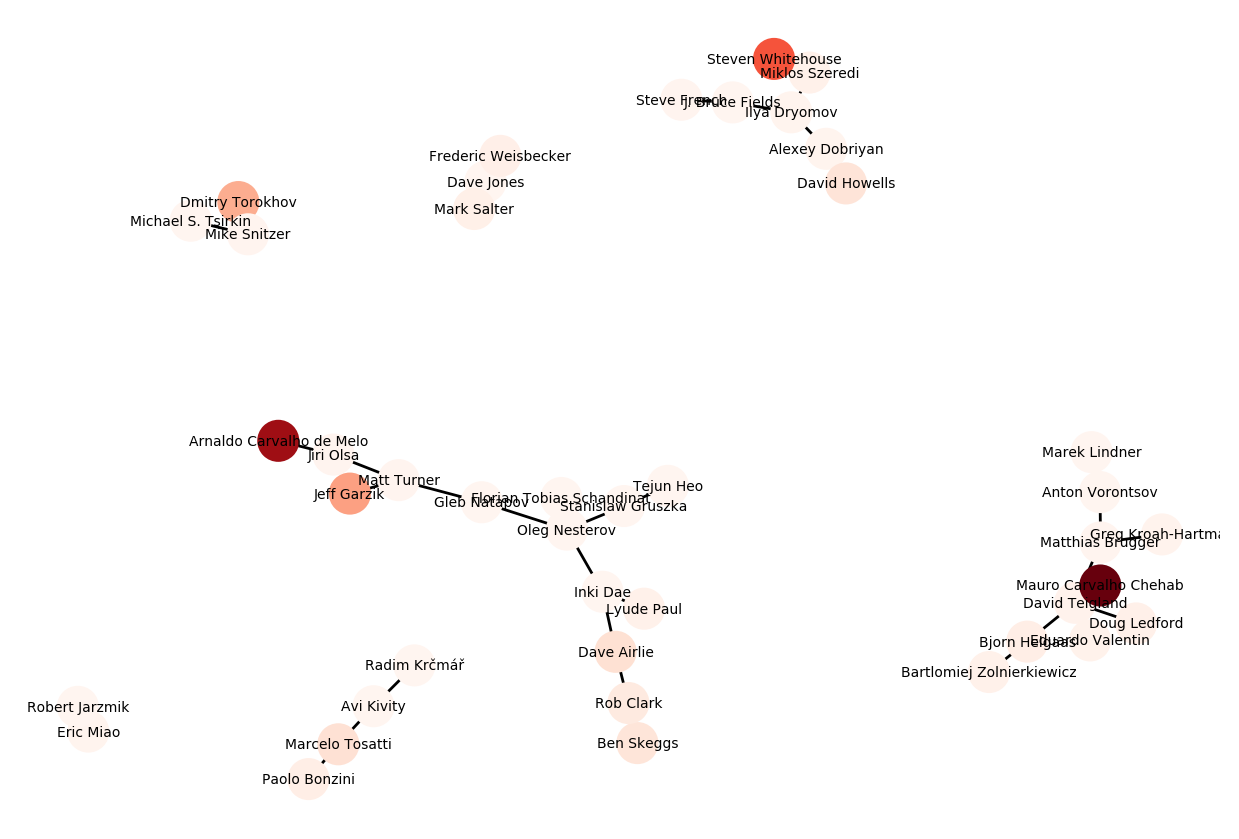

In [74]:
#This graph plot shows the edges and nodes of committers and their neighbors
#the shades of nodes represent the percentage of changes that they've made
import networkx as n
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':knn_df['committer_name'], 'to':knn_df['neighbor']})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':knn_df['committer_name'], 'myvalue':knn_df['added']+knn_df['removed']+knn_df['whitespace']})
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac, to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# Plot it, providing a continuous color scale with cmap:
nx.draw(G, with_labels=True, node_color=carac['myvalue'], cmap=plt.cm.Reds, font_size=5, node_size=200)

In [53]:
res = []
for ele in knn_df['committer_name']:
    compare_tmp=df_proj_init['committer_affiliation'][df_proj_init['committer_name']==ele]
    res.append(compare_tmp.iloc[0])
knn_df['affiliation']=res


In [55]:
knn_df[['committer_name','neighbor','affiliation']]

,committer_name,neighbor,affiliation
0,Alexey Dobriyan,Ilya Dryomov,RH/V
1,Anton Vorontsov,Marek Lindner,RH/V
2,Arnaldo Carvalho de Melo,Jiri Olsa,redhat
3,Avi Kivity,Radim Krčmář,redhat
4,Bartlomiej Zolnierkiewicz,Bjorn Helgaas,RH/V
5,Ben Skeggs,Rob Clark,redhat
6,Bjorn Helgaas,David Teigland,RH/V
7,Dave Airlie,Inki Dae,redhat
8,Dave Jones,Mark Salter,redhat
9,David Howells,Alexey Dobriyan,redhat


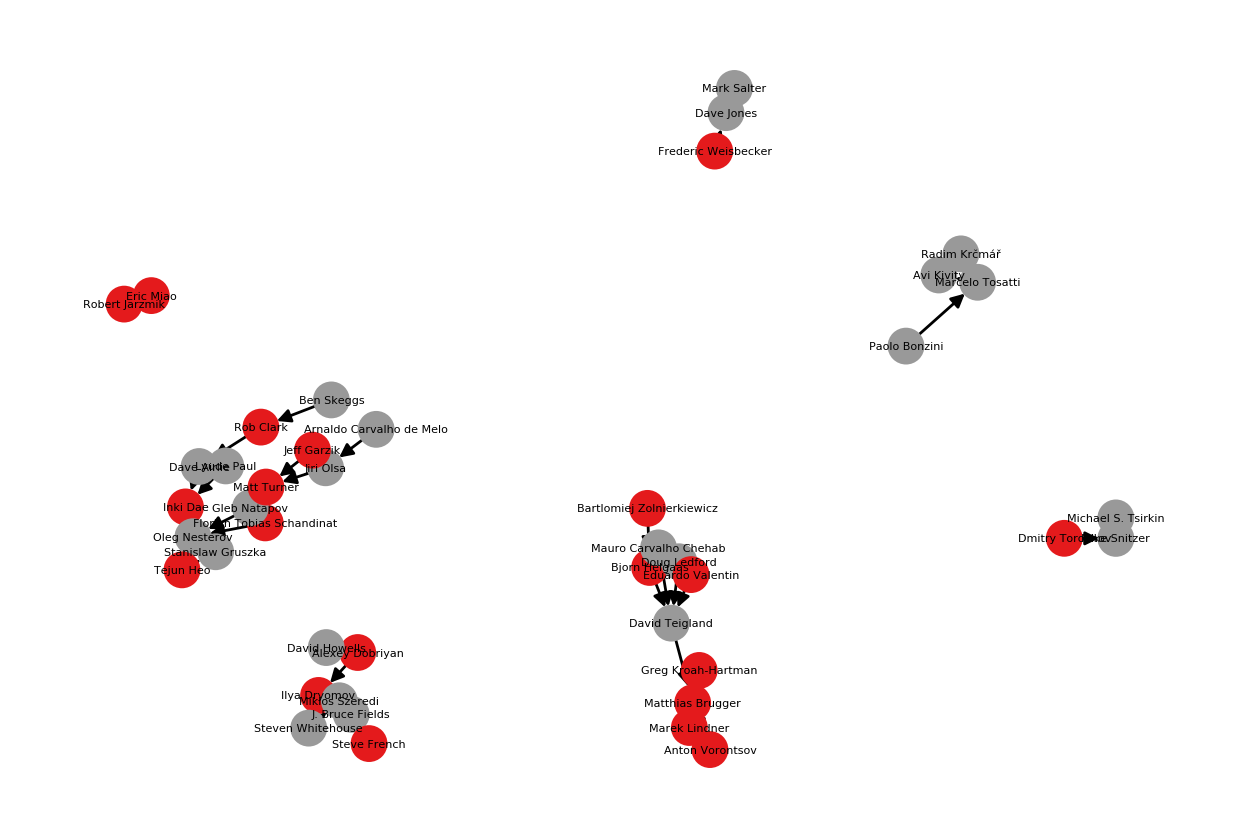

In [138]:
#This graph plot shows the edges and nodes of committers and their neighbors
#the shades of nodes represent if the committer is defined redhatter or not known yet

#Add a column to indicate affiliation
knn_df['affiliation']=res

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':knn_df['committer_name'], 'to':knn_df['neighbor']})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':knn_df['committer_name'], 'myvalue':knn_df['affiliation']})
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, arrows=True, 
        cmap=plt.cm.Set1, node_size=150, font_size=4)